In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок


In [63]:
#считываем данные
stud = pd.read_csv('C:/Users/Public/Documents/SkillFactory/stud_math.xls', quotechar = '"')
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [64]:
# Заполняем  пустые категориальные значения наиболее часто встречающимся
stud.address = stud.address.fillna (stud.address.mode()[0])
stud.famsize = stud.famsize.fillna (stud.famsize.mode()[0])
stud.Pstatus = stud.Pstatus.fillna (stud.Pstatus.mode()[0])
stud.Medu = stud.Medu.fillna (stud.Medu.mode()[0])
stud.Fedu = stud.Fedu.fillna (stud.Fedu.mode()[0])
stud.Mjob = stud.Mjob.fillna (stud.Mjob.mode()[0])
stud.Fjob = stud.Fjob.fillna (stud.Fjob.mode()[0])
stud.reason = stud.reason.fillna (stud.reason.mode()[0])
stud.guardian = stud.guardian.fillna (stud.guardian.mode()[0])
stud.traveltime = stud.traveltime.fillna (stud.traveltime.mode()[0])
stud.studytime = stud.studytime.fillna (stud.studytime.mode()[0])
stud.failures = stud.failures.fillna (stud.failures.mode()[0])
stud.schoolsup = stud.schoolsup.fillna (stud.schoolsup.mode()[0])
stud.famsup = stud.famsup.fillna (stud.famsup.mode()[0])
stud.paid = stud.paid.fillna (stud.paid.mode()[0])
stud.activities = stud.activities.fillna (stud.activities.mode()[0])
stud.nursery = stud.nursery.fillna (stud.nursery.mode()[0])
stud.higher = stud.higher.fillna (stud.higher.mode()[0])
stud.internet = stud.internet.fillna (stud.internet.mode()[0])
stud.romantic = stud.romantic.fillna (stud.romantic.mode()[0])
stud.famrel = stud.famrel.fillna (stud.famrel.mode()[0])
stud.freetime = stud.freetime.fillna (stud.freetime.mode()[0])
stud.goout = stud.goout.fillna (stud.goout.mode()[0])
stud.health = stud.health.fillna (stud.health.mode()[0])
stud.absences = stud.absences.fillna (stud.absences.mean())

In [65]:
#Столбец практически дублирует другой, studytime. Удаляем
stud.drop(['studytime, granular'], inplace = True, axis = 1)

In [69]:
# Удаляем строки, если в score - пустые значения
stud = stud.dropna(subset=['score'])
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      389 non-null    object 
 1   sex         389 non-null    object 
 2   age         389 non-null    int64  
 3   address     389 non-null    object 
 4   famsize     389 non-null    object 
 5   Pstatus     389 non-null    object 
 6   Medu        389 non-null    float64
 7   Fedu        389 non-null    float64
 8   Mjob        389 non-null    object 
 9   Fjob        389 non-null    object 
 10  reason      389 non-null    object 
 11  guardian    389 non-null    object 
 12  traveltime  389 non-null    float64
 13  studytime   389 non-null    float64
 14  failures    389 non-null    float64
 15  schoolsup   389 non-null    object 
 16  famsup      389 non-null    object 
 17  paid        389 non-null    object 
 18  activities  389 non-null    object 
 19  nursery     389 non-null    o

In [80]:
# устанавливаем признак "категориальности"
stud['school'] = stud['school'].astype('category')
stud['sex'] = stud['sex'].astype('category')
stud['address'] = stud['address'].astype('category')
stud['Pstatus'] = stud['Pstatus'].astype('category')
stud['famsize'] = stud['famsize'].astype('category')
stud['Medu'] = stud['Medu'].astype('category')
stud['Fedu'] = stud['Fedu'].astype('category')
stud['Mjob'] = stud['Mjob'].astype('category')
stud['Fjob'] = stud['Fjob'].astype('category')
stud['reason'] = stud['reason'].astype('category')
stud['guardian'] = stud['guardian'].astype('category')
stud['traveltime'] = stud['traveltime'].astype('category')
stud['studytime'] = stud['studytime'].astype('category')
stud['failures'] = stud['failures'].astype('category')
stud['schoolsup'] = stud['schoolsup'].astype('category')
stud['famsup'] = stud['famsup'].astype('category')
stud['paid'] = stud['paid'].astype('category')
stud['activities'] = stud['activities'].astype('category')
stud['nursery'] = stud['nursery'].astype('category')
stud['higher'] = stud['higher'].astype('category')
stud['internet'] = stud['internet'].astype('category')
stud['romantic'] = stud['romantic'].astype('category')
stud['famrel'] = stud['famrel'].astype('category')
stud['freetime'] = stud['freetime'].astype('category')
stud['goout'] = stud['goout'].astype('category')
stud['health'] = stud['health'].astype('category')

In [71]:
#Определяем характеристики признака "Возраст"
stud.age.describe()

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


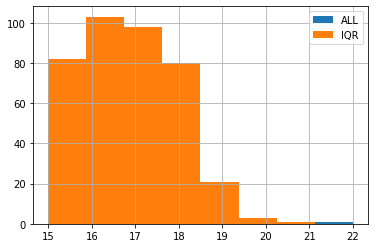

In [72]:
#Анализируем выбросы и строим гистограмму
IQR = stud.age.quantile(0.75) - stud.age.quantile(0.25)
perc25 = stud.age.quantile(0.25)
perc75 = stud.age.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.age.hist(bins = 8, range = (15, 22), label = 'ALL')
stud.age.loc[stud.age.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8, range = (15, 22), label = 'IQR')
plt.legend()

Вывод: Возраст 22 года формально не попадает в диапазон, является "выбросом", однако включаем в анализ (с т.з. здравого смысла)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


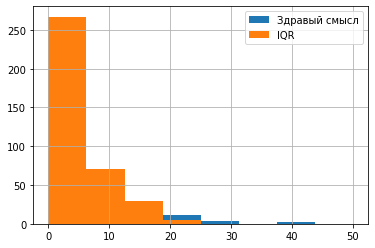

In [77]:
stud.absences.describe()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
stud.absences.loc[stud.absences <= 50].hist(bins = 8, range = (0, 50),label = 'Здравый смысл')
stud.absences.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 8,range = (0, 50), label = 'IQR')
plt.legend();

Вывод: Значения, большие 35, можно считать выбросами

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

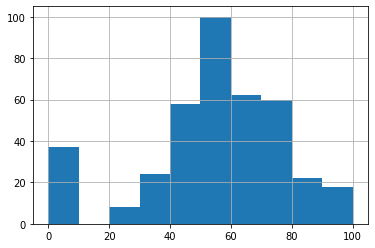

In [78]:
stud.score.hist()
stud.score.describe()

In [81]:
#Составим матрицу корреляций
stud.corr()

,age,absences,score
age,1.000000,0.095672,-0.155726
absences,0.095672,1.000000,0.064008
score,-0.155726,0.064008,1.000000


Выводы.
Имеется слабая отрицательная корреляция между возрастом и успеваемостью.
Очень слабая положительная корреляция между успеваемостью и пропусками занятий - довольно неожиданно. Вероятно на уровне погрешности.

Обрабатываем категориальные данные

Количество уникальных значений категорийных параметров
school        2
sex           2
address       2
famsize       2
Pstatus       2
Medu          5
Fedu          6
Mjob          5
Fjob          5
reason        4
guardian      3
traveltime    4
studytime     4
failures      4
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
famrel        6
freetime      5
goout         5
health        5
dtype: int64


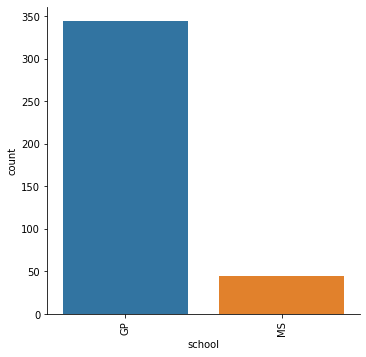

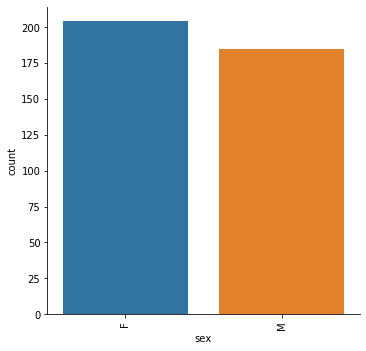

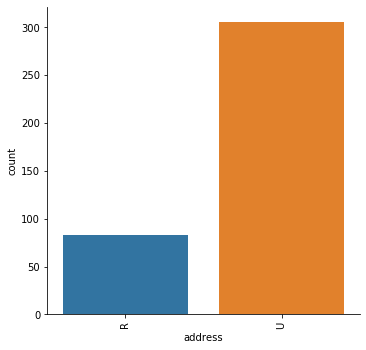

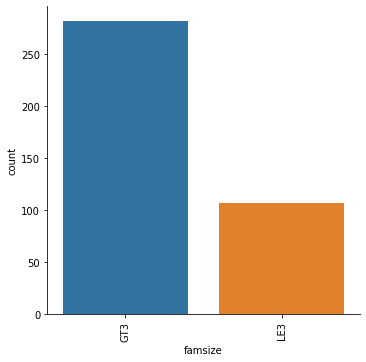

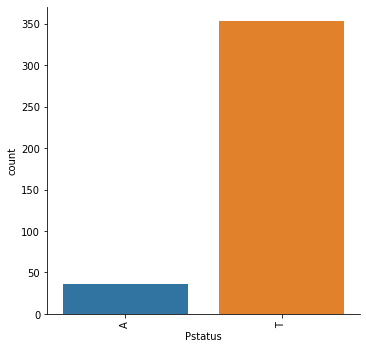

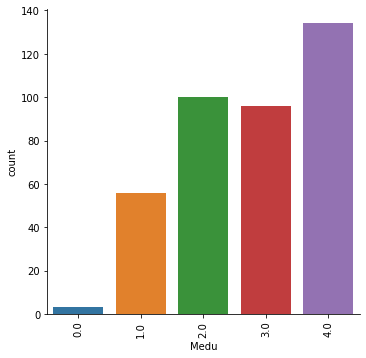

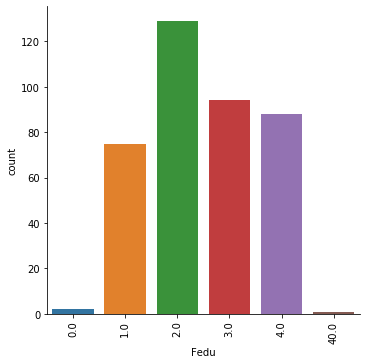

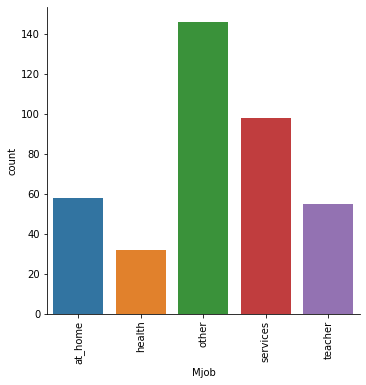

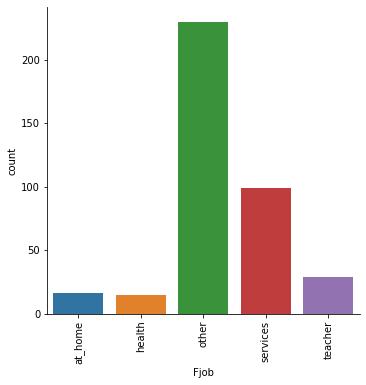

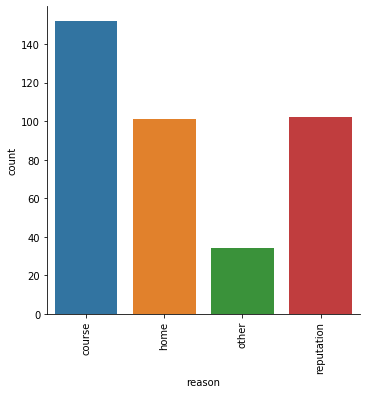

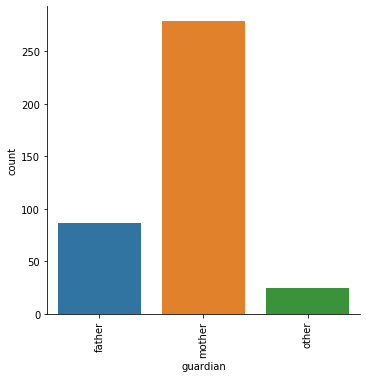

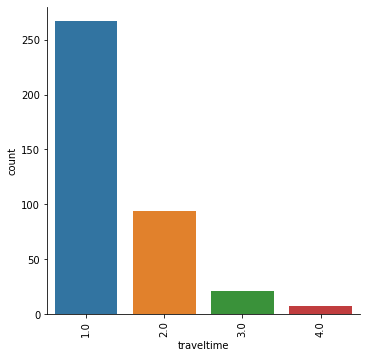

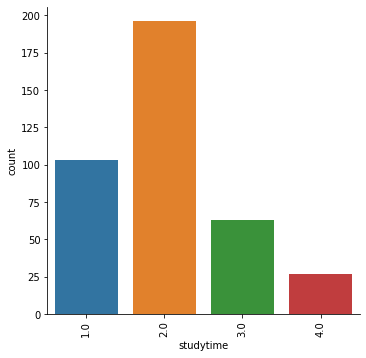

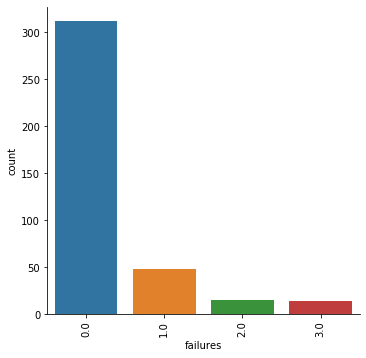

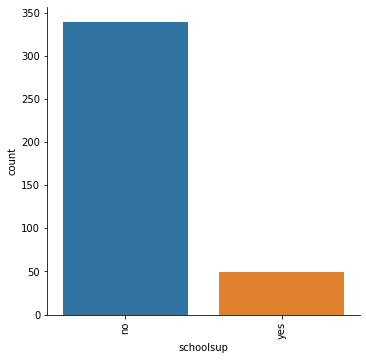

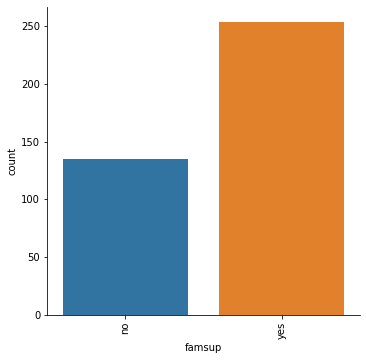

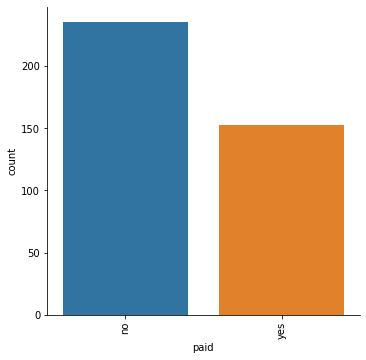

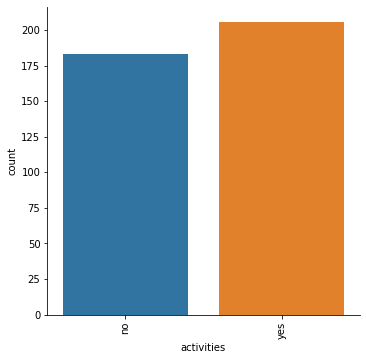

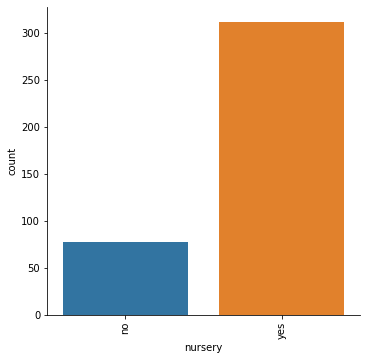

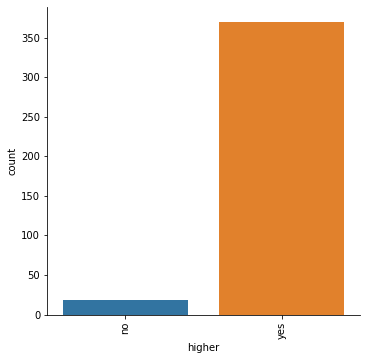

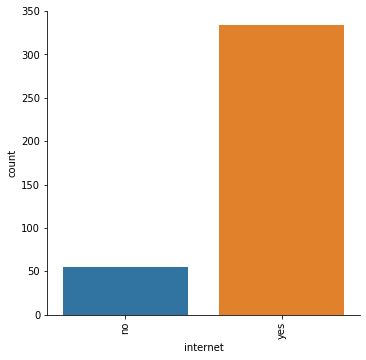

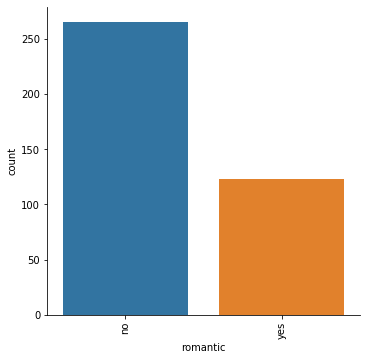

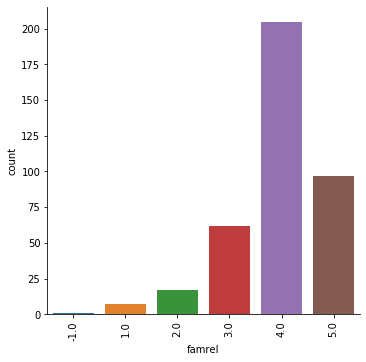

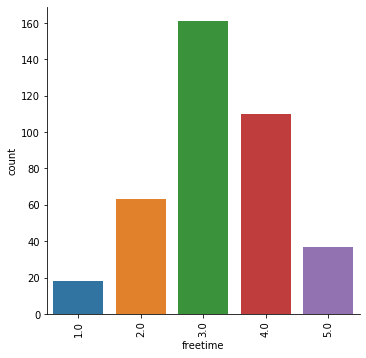

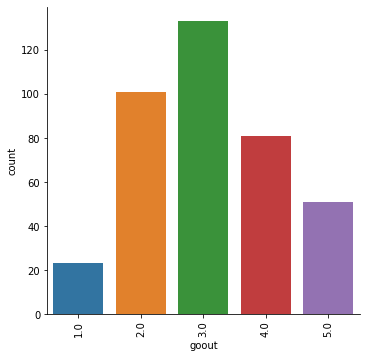

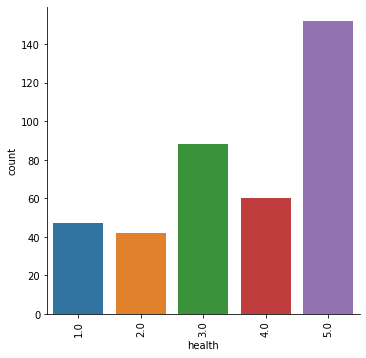

In [82]:
def categorical_eda(df):
    print("Количество уникальных значений категорийных параметров")
    print(df.select_dtypes(include=['category']).nunique())
    # Выводим количественное распределение 
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df)
        fig.set_xticklabels(rotation=90)
        plt.show()
categorical_eda(stud)

In [87]:
# Fedu=40 - явная ошибка. Заменим на 4
stud.Fedu = stud.Fedu.apply(lambda x: '4.0' if (x == 40 or x == '40.0') else x)

In [89]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

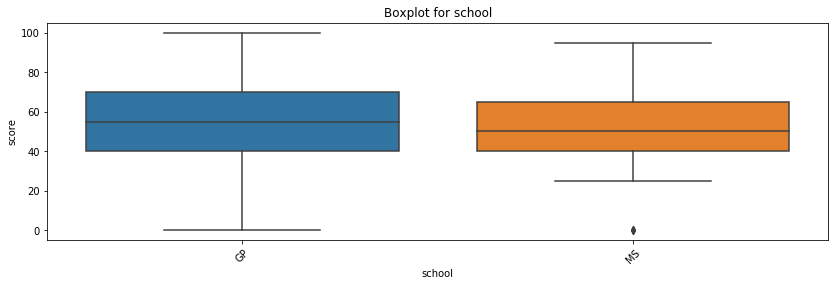

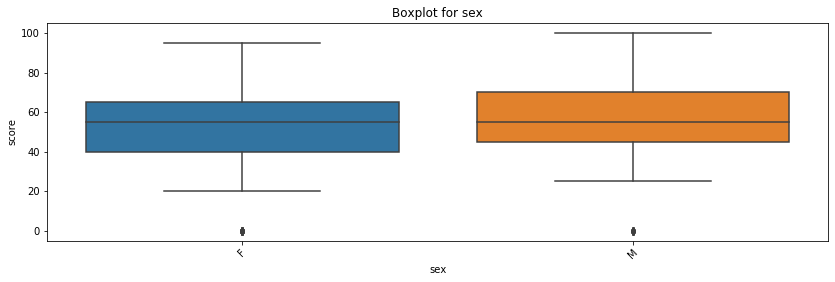

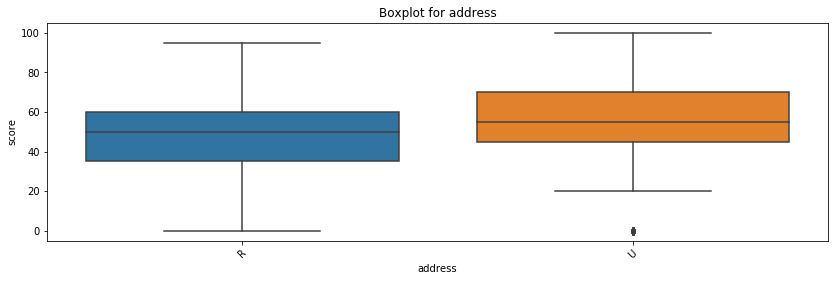

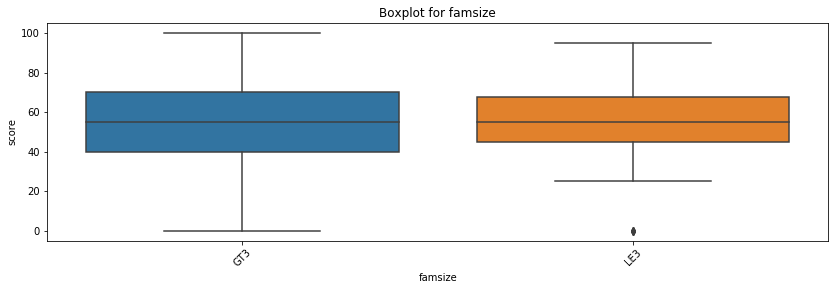

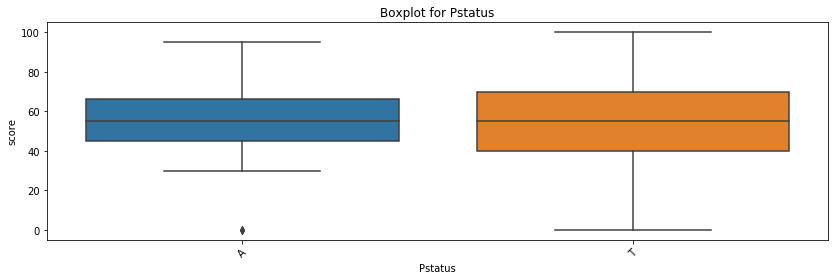

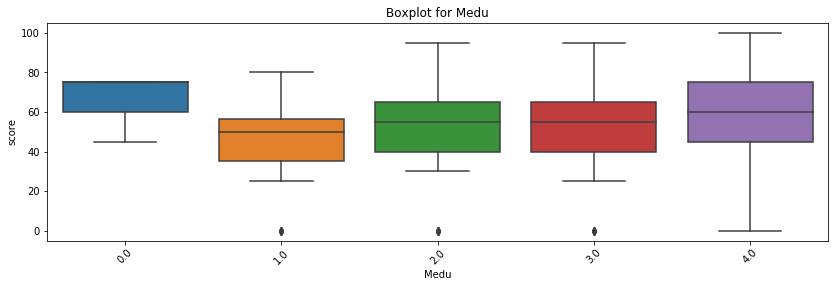

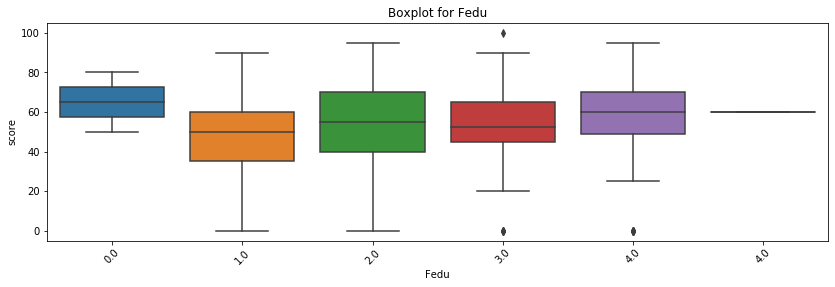

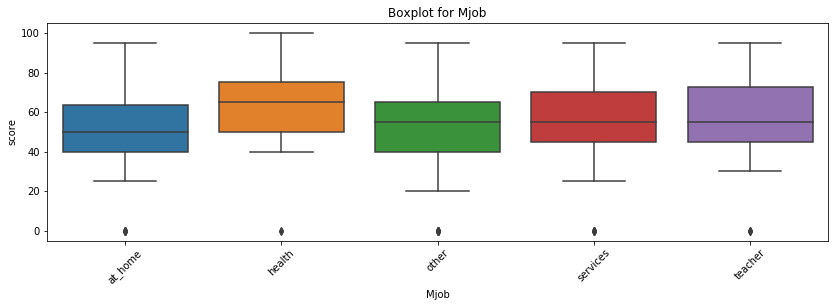

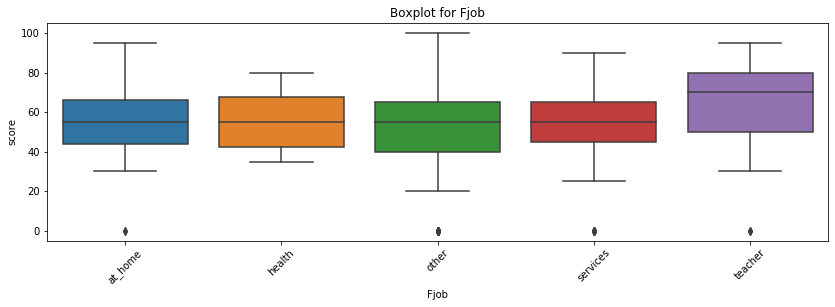

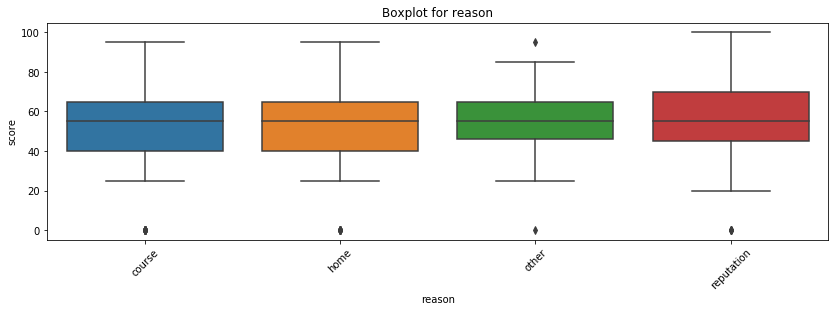

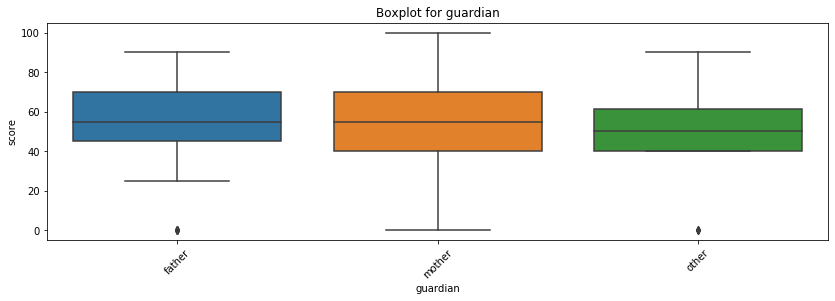

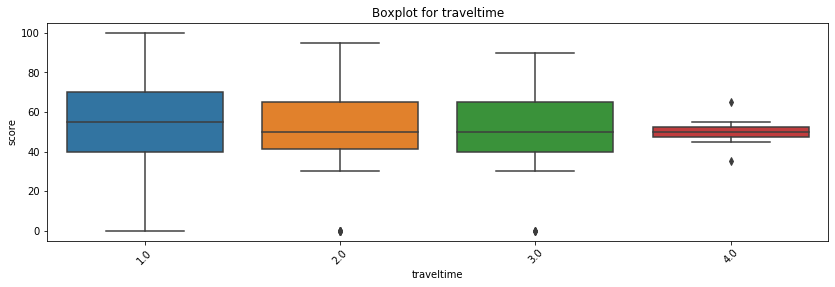

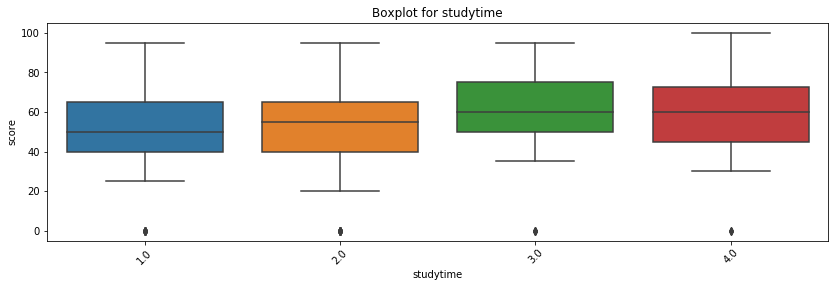

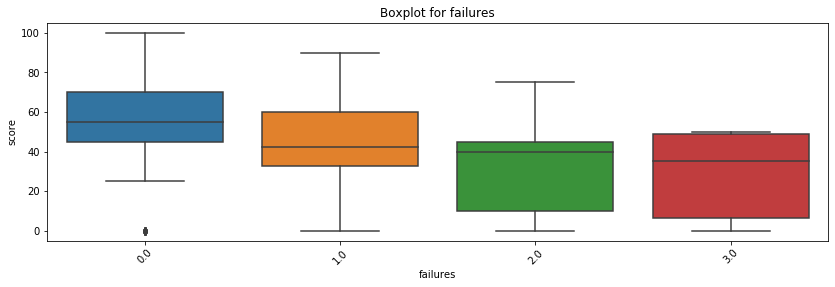

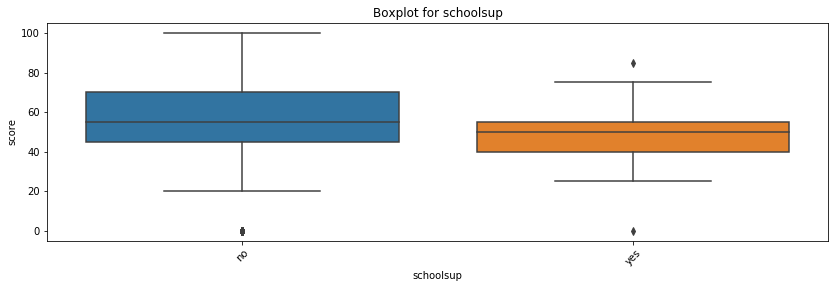

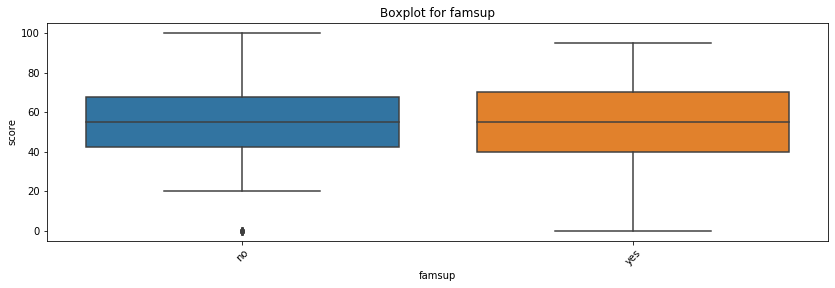

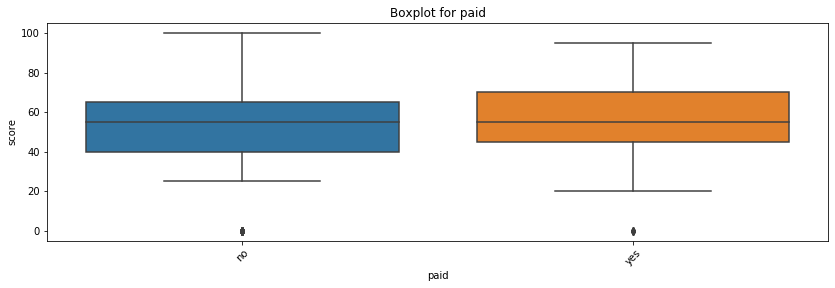

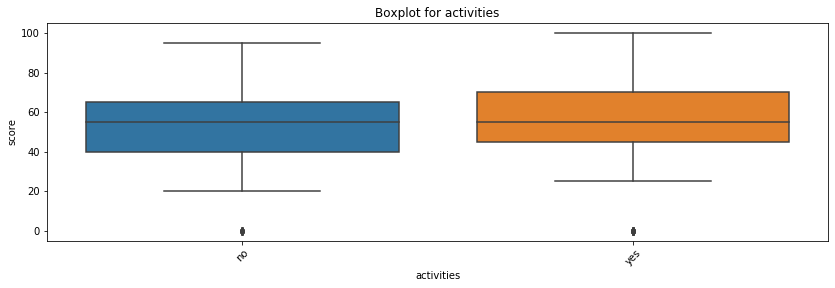

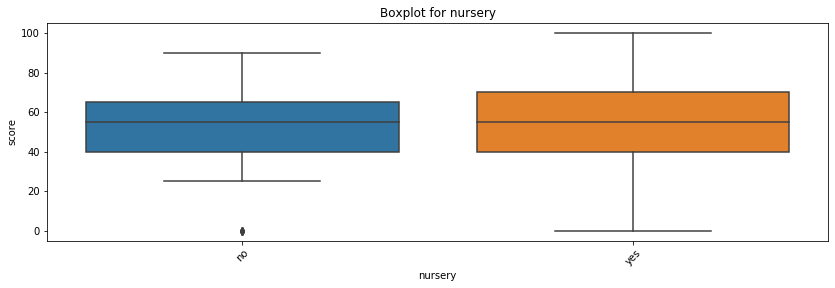

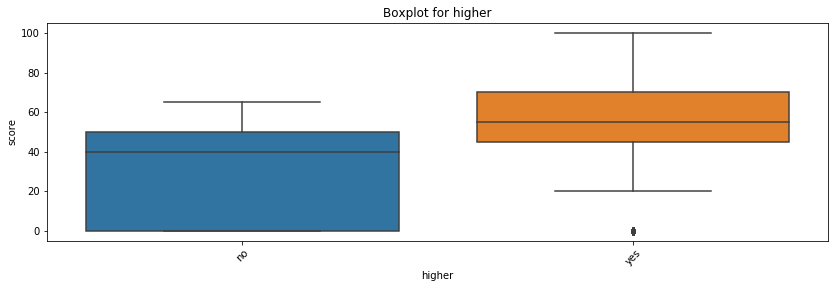

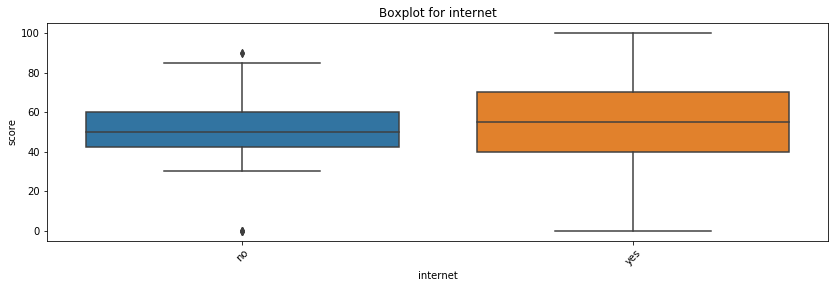

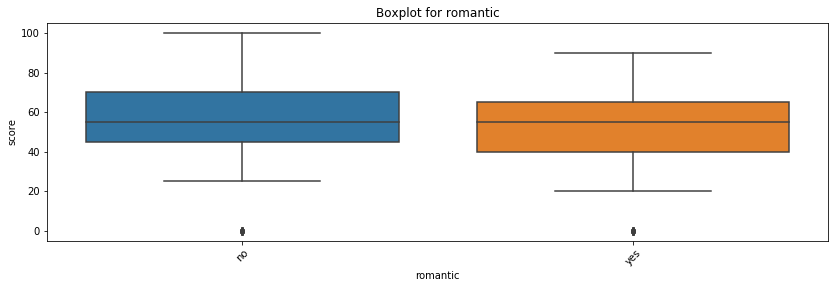

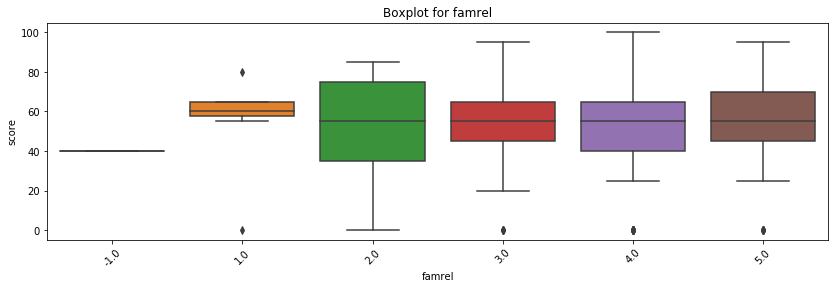

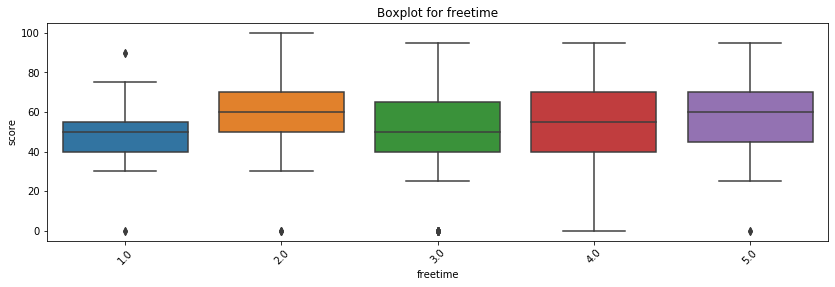

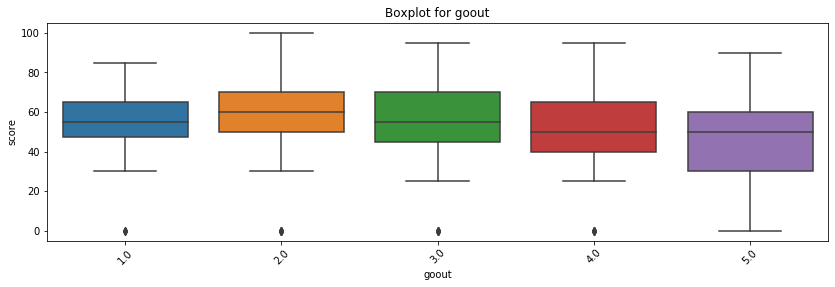

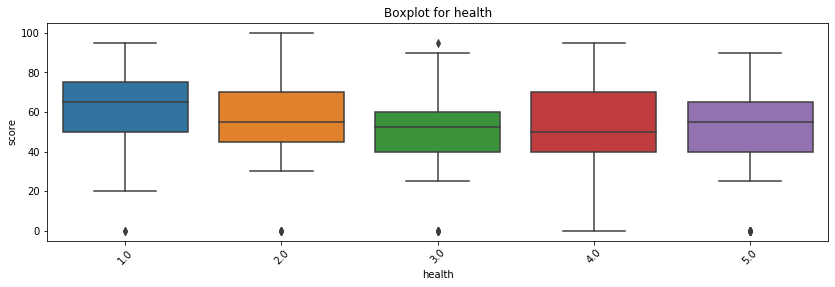

In [90]:
for col in stud.select_dtypes(include='category').columns:
    get_boxplot(col)

Проверим с помощью теста Стьюдента значимость категориальных факторов для конечной оценки

In [97]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:6]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [98]:
for col in stud.select_dtypes(include='category').columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
